In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,NaN,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,NaN,NaN,1.56160,NaN,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,NaN
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,NaN
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	19
float64		column 2	42
float64		column 3	49
float64		column 4	36
float64		column 5	31
float64		column 6	49
float64		column 7	43
float64		column 8	49
float64		column 9	18
float64		column 10	30
float64		column 11	36
float64		column 12	36


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,381.000000,358.000000,351.000000,364.000000,369.000000,351.000000,357.000000,351.000000,382.000000,370.000000,364.000000,364.000000
mean,-0.053357,-0.028947,2.027048,1.893509,1.944979,1.951032,2.055643,1.964077,1.954222,2.006809,1.939630,1.975736
std,2.482938,2.574724,1.108402,1.118692,1.143312,1.127325,1.128174,1.106267,1.141370,1.148716,1.141066,1.176744
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.055837,0.006786,0.001972
25%,-0.658140,-0.735040,1.130500,0.962093,0.933930,1.042650,1.098300,1.048900,0.999935,1.027250,0.914640,0.962440
50%,-0.063939,-0.013094,2.089000,1.770600,1.940600,1.979600,2.110900,1.927100,2.053700,2.056000,1.876400,1.930550
75%,0.761740,0.718727,2.899850,2.775925,2.929000,2.946800,2.972100,2.872800,2.905700,3.028225,2.928725,2.999525
max,7.293000,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.994400,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

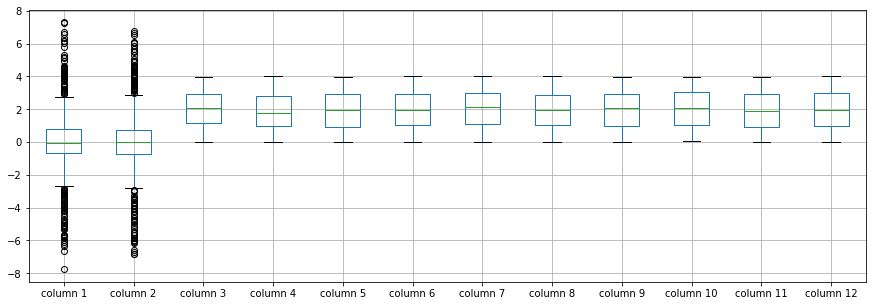

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.053357
column 2    -0.028947
column 3     2.027048
column 4     1.893509
column 5     1.944979
column 6     1.951032
column 7     2.055643
column 8     1.964077
column 9     1.954222
column 10    2.006809
column 11    1.939630
column 12    1.975736
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.010401,0.003186,-0.069755,-0.004351,-0.024345,-0.040885,0.077484,0.007970,0.062639,0.068465,-0.020299
column 2,0.010401,1.000000,-0.114457,0.022252,-0.056149,-0.041271,0.004390,-0.057218,-0.072433,0.010516,0.041290,0.026507
column 3,0.003186,-0.114457,1.000000,0.051039,0.044049,-0.115422,-0.116666,0.091092,0.133573,-0.059755,-0.149360,-0.003479
column 4,-0.069755,0.022252,0.051039,1.000000,0.003788,0.065539,-0.057183,0.083419,-0.030605,0.095455,0.024544,-0.065603
column 5,-0.004351,-0.056149,0.044049,0.003788,1.000000,0.042719,0.047650,0.008876,-0.007735,0.010281,0.004863,-0.064234
column 6,-0.024345,-0.041271,-0.115422,0.065539,0.042719,1.000000,0.026157,0.067417,-0.042086,0.032057,0.007783,-0.032410
column 7,-0.040885,0.004390,-0.116666,-0.057183,0.047650,0.026157,1.000000,-0.087012,0.059142,0.012186,0.004659,-0.100850
column 8,0.077484,-0.057218,0.091092,0.083419,0.008876,0.067417,-0.087012,1.000000,0.055406,-0.164911,-0.060011,0.015968
column 9,0.007970,-0.072433,0.133573,-0.030605,-0.007735,-0.042086,0.059142,0.055406,1.000000,0.035230,0.021029,0.057888
column 10,0.062639,0.010516,-0.059755,0.095455,0.010281,0.032057,0.012186,-0.164911,0.035230,1.000000,0.029844,0.004551


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+34,12+34+34,12+34+34+34,12+34+34+34+34,12+34+34+34+34+34,12+34+34+34+34+34+34,12+34+34+34+34+34+34+34,12+34+34+34+34+34+34,12+34+34+34+34+34,12+34+34+34+34,12+34+34+34,12+34+34,12+34,12], vae_layer = False, seed = 34)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 24.965691299438475
Epoch: 1 , loss: 24.958319854736327
Epoch: 2 , loss: 24.888182678222655
Epoch: 3 , loss: 24.714652786254884
Epoch: 4 , loss: 24.43922866821289
Epoch: 5 , loss: 22.88702049255371
Epoch: 6 , loss: 21.44791763305664
Epoch: 7 , loss: 20.843574981689454
Epoch: 8 , loss: 20.694093551635742
Epoch: 9 , loss: 20.228627548217773
Epoch: 10 , loss: 19.991943817138672
Epoch: 11 , loss: 19.727666320800783
Epoch: 12 , loss: 19.364576416015623
Epoch: 13 , loss: 19.276565322875978
Epoch: 14 , loss: 18.79468620300293
Epoch: 15 , loss: 18.5849520111084
Epoch: 16 , loss: 18.710971450805665
Epoch: 17 , loss: 18.512471618652345
Epoch: 18 , loss: 18.13307434082031
Epoch: 19 , loss: 18.297263107299806
Epoch: 20 , loss: 18.09192329406738
Epoch: 21 , loss: 17.982034606933595
Epoch: 22 , loss: 17.94789077758789
Epoch: 23 , loss: 17.361004905700682
Epoch: 24 , loss: 18.00208583831787
Epoch: 25 , loss: 17.767026

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,-0.063827,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.992275,-1.43674,0.0,-1.818499,0.000000,0.0,0.0,0.0,0.0,0.000000,0.472034
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
396,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-2.566428
397,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,-1.960791
398,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(43.53857238340715, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.26665878547936384

In [18]:
new_df.iloc[66,:]

column 1     0.822720
column 2     0.267760
column 3     2.440832
column 4     1.187200
column 5     3.956600
column 6     2.583000
column 7     2.830600
column 8     3.074200
column 9     1.538100
column 10    0.246200
column 11    0.853340
column 12    2.372457
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,-0.021342,1.97890,1.83630,2.886600,2.469600,0.21541,3.09000,0.78343,0.51035,0.030430,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.129900,1.277800,1.42850,0.14333,1.19480,2.13180,0.984730,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.768200,1.210000,3.99630,2.21730,3.90290,1.51440,2.438900,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.190270,0.567160,1.66010,2.35270,0.66126,3.13510,3.938100,3.734600
4,-0.268400,-0.013725,1.44546,1.56160,1.382901,3.377400,1.52260,0.98475,3.10940,3.65640,3.917200,1.419094
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.882690,0.354060,1.62780,3.29400,1.08500,0.15740,0.465040,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.418700,1.686100,1.09510,3.79360,0.12790,0.54249,3.365800,1.189172
397,-3.479100,-1.993300,1.32480,1.77210,2.550900,1.470100,0.92540,1.84110,3.47730,0.95496,1.526300,0.163009
398,7.293000,-0.411470,2.49480,0.39655,2.999000,3.410100,2.95160,0.27800,0.99059,3.43740,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_NE_10(imp).xlsx", index=False, header=False)